#Postwork 1. Estimados de locación y variabilidad

In [ ]:
#Importamos módulos necesarios
import pandas as pd
import numpy as np
from scipy import stats

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Limpieza de datos

Cargamos nuestro dataset y lo almacenamos en un DataFrame, para poder trabajar con datos limpios.

In [ ]:
#Importamos primero nuestro dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/modulo 4/COVID-19 Survey Student Responses.csv')
df.head()

,ID,Region of residence,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Prefered social media platform,Time spent on TV,Number of meals per day,Change in your weight,Health issue during lockdown,Stress busters,Time utilized,"Do you find yourself more connected with your family, close friends , relatives ?",What you miss the most
0,R1,Delhi-NCR,21,2.0,Good,Laptop/Desktop,4.0,0.0,7.0,3.0,Linkedin,1,4,Increased,NO,Cooking,YES,YES,School/college
1,R2,Delhi-NCR,21,0.0,Excellent,Smartphone,0.0,2.0,10.0,3.0,Youtube,0,3,Decreased,NO,Scrolling through social media,YES,NO,Roaming around freely
2,R3,Delhi-NCR,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,Linkedin,0,3,Remain Constant,NO,Listening to music,NO,YES,Travelling
3,R4,Delhi-NCR,20,3.0,Very poor,Smartphone,2.0,1.0,6.0,5.0,Instagram,0,3,Decreased,NO,Watching web series,NO,NO,"Friends , relatives"
4,R5,Delhi-NCR,21,3.0,Good,Laptop/Desktop,3.0,1.0,8.0,3.0,Instagram,1,4,Remain Constant,NO,Social Media,NO,NO,Travelling


In [ ]:
df.isna().sum()

ID                                                                                     0
Region of residence                                                                    0
Age of Subject                                                                         0
Time spent on Online Class                                                             0
Rating of Online Class experience                                                     24
Medium for online class                                                               51
Time spent on self study                                                               0
Time spent on fitness                                                                  0
Time spent on sleep                                                                    0
Time spent on social media                                                             0
Prefered social media platform                                                         0
Time spent on TV     

In [ ]:
#Renombramos columna por faacilidad
df.rename(columns = {'Do you find yourself more connected with your family, close friends , relatives  ?':'Emotional connections'}, inplace = True)

In [ ]:
df = df.drop('ID', axis=1)
#df.index.name = 'ID'

In [ ]:
df.head()

,Region of residence,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Prefered social media platform,Time spent on TV,Number of meals per day,Change in your weight,Health issue during lockdown,Stress busters,Time utilized,Emotional connections,What you miss the most
0,Delhi-NCR,21,2.0,Good,Laptop/Desktop,4.0,0.0,7.0,3.0,Linkedin,1,4,Increased,NO,Cooking,YES,YES,School/college
1,Delhi-NCR,21,0.0,Excellent,Smartphone,0.0,2.0,10.0,3.0,Youtube,0,3,Decreased,NO,Scrolling through social media,YES,NO,Roaming around freely
2,Delhi-NCR,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,Linkedin,0,3,Remain Constant,NO,Listening to music,NO,YES,Travelling
3,Delhi-NCR,20,3.0,Very poor,Smartphone,2.0,1.0,6.0,5.0,Instagram,0,3,Decreased,NO,Watching web series,NO,NO,"Friends , relatives"
4,Delhi-NCR,21,3.0,Good,Laptop/Desktop,3.0,1.0,8.0,3.0,Instagram,1,4,Remain Constant,NO,Social Media,NO,NO,Travelling


In [ ]:
df['Medium for online class'] = df['Medium for online class'].fillna('No medium')

In [ ]:
df['Rating of Online Class experience'] = df['Rating of Online Class experience'].fillna('No rating')

In [ ]:
#Vemos valores para hacer la columna numérica
set(df['Time spent on TV'])

{' ',
 '0',
 '0.1',
 '0.25',
 '0.3',
 '0.4',
 '0.5',
 '0.6',
 '0.75',
 '1',
 '1.5',
 '15',
 '2',
 '2.5',
 '3',
 '3.5',
 '4',
 '4.5',
 '5',
 '6',
 '7',
 '8',
 'N',
 'No tv',
 'n'}

Reemplazamos los datos que no son numéricos por 0 y al final hacemos que la columna sea del tipo numérica.

In [ ]:
df['Time spent on TV'] = df['Time spent on TV'].replace({'N': 0, 'No tv':0, 'n': 0, ' ':0}).astype(float)

## Identificación de las columnas del dataset con datos numéricos.

In [ ]:
df.dtypes

Region of residence                   object
Age of Subject                         int64
Time spent on Online Class           float64
Rating of Online Class experience     object
Medium for online class               object
Time spent on self study             float64
Time spent on fitness                float64
Time spent on sleep                  float64
Time spent on social media           float64
Prefered social media platform        object
Time spent on TV                     float64
Number of meals per day                int64
Change in your weight                 object
Health issue during lockdown          object
Stress busters                        object
Time utilized                         object
Emotional connections                 object
What you miss the most                object
dtype: object

In [ ]:
df_num = df.select_dtypes('number')
df_num.head()

,Age of Subject,Time spent on Online Class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Time spent on TV,Number of meals per day
0,21,2.0,4.0,0.0,7.0,3.0,1.0,4
1,21,0.0,0.0,2.0,10.0,3.0,0.0,3
2,20,7.0,3.0,0.0,6.0,2.0,0.0,3
3,20,3.0,2.0,1.0,6.0,5.0,0.0,3
4,21,3.0,3.0,1.0,8.0,3.0,1.0,4


## Identificación de la relevancia de las columnas

* La columna Age of subject es importante para obtener conclusiones en relación a la edad, que está directamente relacionada con la madurez, pensamientos y comportamiento.
* Las columnas desde Time spent on Online Class a Time spent on TV media nos permiten estudiar los hábitos de estudio de los encuestados.
* La columna Number of meals per day nos permite relacionar los hábitos alimenticios con la productividad, la salud y las relaciones personales.

## Obtención de estimados para las columnas numéricas

### Promedio

In [ ]:
df_num.mean()

Age of Subject                20.165821
Time spent on Online Class     3.208841
Time spent on self study       2.911591
Time spent on fitness          0.765821
Time spent on sleep            7.871235
Time spent on social media     2.365694
Time spent on TV               1.013959
Number of meals per day        2.917936
dtype: float64

Parece que la mayoría de los estudiantes estará rondando los 20 años. En promedio duermen 8 horas y comen 3 veces al día. En total dedican 6 horas al día al estudio, pasando la mitad del tiempo en las clases en línea y la otra mitad estudiando por su cuenta.

### Mediana

In [ ]:
df_num.median()

Age of Subject                20.0
Time spent on Online Class     3.0
Time spent on self study       2.0
Time spent on fitness          1.0
Time spent on sleep            8.0
Time spent on social media     2.0
Time spent on TV               1.0
Number of meals per day        3.0
dtype: float64

Además, parece que hay muchos estudiantes que hacen 1 hora de ejercicio al día, y se distraen unas 3 horas al día, usando 2 de esas horas en redes sociales y 1 hora viendo televisión.

### Media truncada.

Al aumentar el proncentaje de datos extremos eliminados, la variación de la media para el 10% es casi imperceptible y para el 20% tampoco se encuentran diferencias significativas.

In [ ]:
for i in range(8):
  print(df_num.columns[i], round(stats.trim_mean(df_num, 0.1)[i],2))

Age of Subject 19.54
Time spent on Online Class 3.13
Time spent on self study 2.64
Time spent on fitness 0.68
Time spent on sleep 7.75
Time spent on social media 2.1
Time spent on TV 0.8
Number of meals per day 2.91


In [ ]:
for i in range(8):
  print(df_num.columns[i], round(stats.trim_mean(df_num, 0.2)[i],2))

Age of Subject 19.71
Time spent on Online Class 3.14
Time spent on self study 2.57
Time spent on fitness 0.69
Time spent on sleep 7.75
Time spent on social media 1.96
Time spent on TV 0.73
Number of meals per day 2.88


### Desviación estándar.


In [ ]:
round(df_num.std(),2)

Age of Subject                5.52
Time spent on Online Class    2.10
Time spent on self study      2.14
Time spent on fitness         0.72
Time spent on sleep           1.62
Time spent on social media    1.77
Time spent on TV              1.27
Number of meals per day       0.83
dtype: float64

No parece que la diferencia sea muy grande en las distintas columnas. El valor de la desviación estándar en la edad es esperado ya que normalmente ronda por los 20 años. Hay estudiantes que estudian algunas horas más y otros menos como es de esperarse.

### Rango

In [ ]:
#Máximo
df_num.max(axis=0)

Age of Subject                59.0
Time spent on Online Class    10.0
Time spent on self study      18.0
Time spent on fitness          5.0
Time spent on sleep           15.0
Time spent on social media    10.0
Time spent on TV              15.0
Number of meals per day        8.0
dtype: float64

In [ ]:
#Mínimo 
df_num.min(axis=0)

Age of Subject                7.0
Time spent on Online Class    0.0
Time spent on self study      0.0
Time spent on fitness         0.0
Time spent on sleep           4.0
Time spent on social media    0.0
Time spent on TV              0.0
Number of meals per day       1.0
dtype: float64

In [ ]:
#Rango
df_num.max(axis=0)-df_num.min(axis=0)

Age of Subject                52.0
Time spent on Online Class    10.0
Time spent on self study      18.0
Time spent on fitness          5.0
Time spent on sleep           11.0
Time spent on social media    10.0
Time spent on TV              15.0
Number of meals per day        7.0
dtype: float64

El rango de edad es grande, por lo que hay adultos de mayor edad que también fueron evaluados, además de que hay alguien de 7 años, el cual parece ser un valor atípico considerando nuestra desviación estándar. Además de que hay estudiantes que estudian todo el día, y otros que prácticamente no lo hacen. Imaginamos que son quienes han visto más afectados sus hábitos de estudio.

### Percentiles

In [ ]:
def per(df, value):
  return [df[i].quantile(value) for i in df_num]

datos = {
    'Percentil 10': per(df_num, 0.1),
    'Percentil 25': per(df_num, 0.25),
    'Percentil 50': per(df_num, 0.5),
    'Percentil 75': per(df_num, 0.75),
    'Percentil 90': per(df_num, 0.9)
}

df_per = pd.DataFrame(datos)
df_per.index = df_num.columns

df_per

,Percentil 10,Percentil 25,Percentil 50,Percentil 75,Percentil 90
Age of Subject,14.0,17.0,20.0,21.0,24.0
Time spent on Online Class,0.0,2.0,3.0,5.0,6.0
Time spent on self study,1.0,2.0,2.0,4.0,6.0
Time spent on fitness,0.0,0.0,1.0,1.0,2.0
Time spent on sleep,6.0,7.0,8.0,9.0,10.0
Time spent on social media,1.0,1.0,2.0,3.0,5.0
Time spent on TV,0.0,0.0,1.0,2.0,2.0
Number of meals per day,2.0,2.0,3.0,3.0,4.0


### Rango intercuartil

In [ ]:
df_num.quantile(0.75) - df_num.quantile(0.25)

Age of Subject                4.0
Time spent on Online Class    3.0
Time spent on self study      2.0
Time spent on fitness         1.0
Time spent on sleep           2.0
Time spent on social media    2.0
Time spent on TV              2.0
Number of meals per day       1.0
dtype: float64

# Postwork 2. Introducción a la visualización de datos: Distribuciones

Continuaremos con nuestro conjunto de datos para visualizar distribuciones, filtrar valores atípicos y caracterizar nuestras distribuciones.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
sns.set(style="whitegrid", context="talk")

## Boxplots

Analizamos la distribución de las variables numéricas, y dependiendo del rango intercuantílico encontrado, decidimos filtrar algunos valores atípicos.

### Age

In [ ]:
def graphic_filter(df,column_name, val):
  fig, axes = plt.subplots(1, 2, figsize=(12, 4))
  media_sin_filtro = df[column_name].mean()
  sns.boxplot(ax=axes[0], x=df[column_name]).set_title('No filter')
  axes[0].axvline( media_sin_filtro, c='r',ls=':')

  iqr = df[column_name].quantile(0.75) - df[column_name].quantile(0.25)
  filtro_inferior = df[column_name] > df[column_name].quantile(0.25) - (iqr * val)
  filtro_superior = df[column_name] < df[column_name].quantile(0.75) + (iqr * val)

  df_filtrado = df[filtro_inferior & filtro_superior]
  media_con_filtro = df_filtrado[column_name].mean()
  sns.boxplot(ax=axes[1], x=df_filtrado[column_name]).set_title('Filtered')
  axes[1].axvline(media_con_filtro, c='r',ls=':')
  print(f'Media antes del filtro: {media_sin_filtro:.2f}')
  print(f'Mediana antes del filtro: {df[column_name].median()}')
  print(f'Desviación estándar antes del filtro: {df[column_name].std():.2f}')
  print('')
  print(f'Media después del filtro: {media_con_filtro:.2f}')
  print(f'Mediana después del filtro: {df_filtrado[column_name].median()}')
  print(f'Desviación estándar después del filtro: {df_filtrado[column_name].std():.2f}')

Media antes del filtro: 20.17
Mediana antes del filtro: 20.0
Desviación estándar antes del filtro: 5.52

Media después del filtro: 19.15
Mediana después del filtro: 20.0
Desviación estándar después del filtro: 3.47


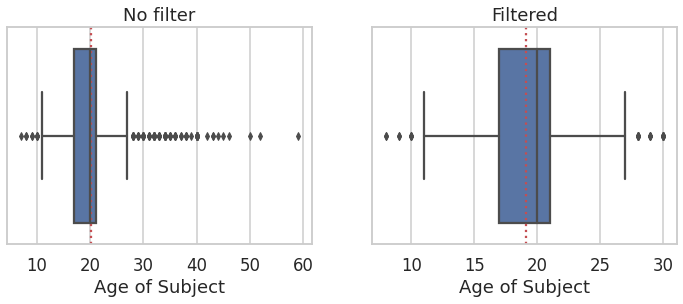

In [ ]:
graphic_filter(df_num, 'Age of Subject', 2.5)

### Time spent on online class

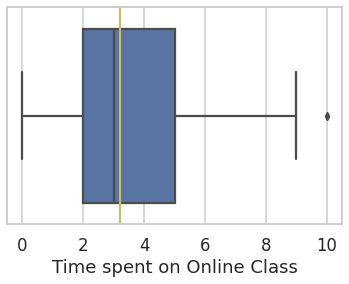

In [ ]:
sns.boxplot(x=df['Time spent on Online Class'])
plt.axvline(df['Time spent on Online Class'].mean(), c='y')

### Time spent on self study

Media antes del filtro: 2.91
Mediana antes del filtro: 2.0
Desviación estándar antes del filtro: 2.14

Media después del filtro: 2.55
Mediana después del filtro: 2.0
Desviación estándar después del filtro: 1.51


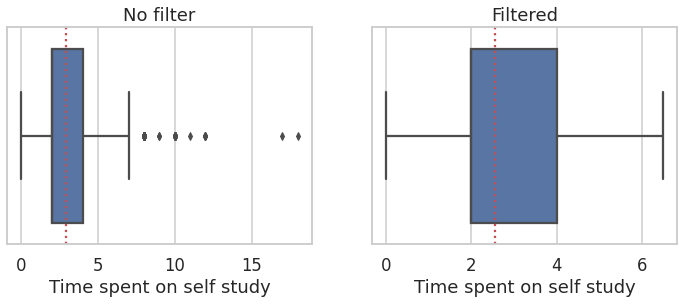

In [ ]:
graphic_filter(df, 'Time spent on self study', 1.5)

### Time spent on fitness

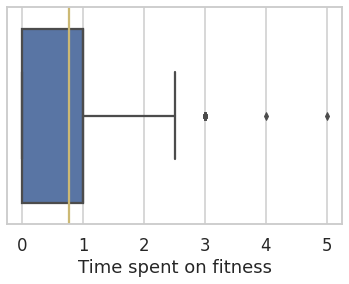

In [ ]:
sns.boxplot(x=df['Time spent on fitness'])
plt.axvline(df['Time spent on fitness'].mean(), c='y')

### Time spent on sleep

Media antes del filtro: 7.87
Mediana antes del filtro: 8.0
Desviación estándar antes del filtro: 1.62

Media después del filtro: 7.69
Mediana después del filtro: 8.0
Desviación estándar después del filtro: 1.33


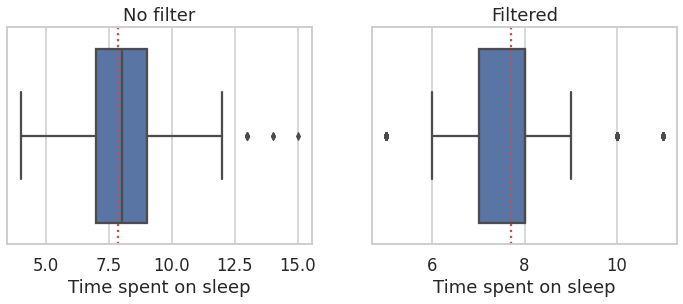

In [ ]:
graphic_filter(df, 'Time spent on sleep', 1.5)

### Time spent on sleep

Media antes del filtro: 7.87
Mediana antes del filtro: 8.0
Desviación estándar antes del filtro: 1.62

Media después del filtro: 7.69
Mediana después del filtro: 8.0
Desviación estándar después del filtro: 1.33


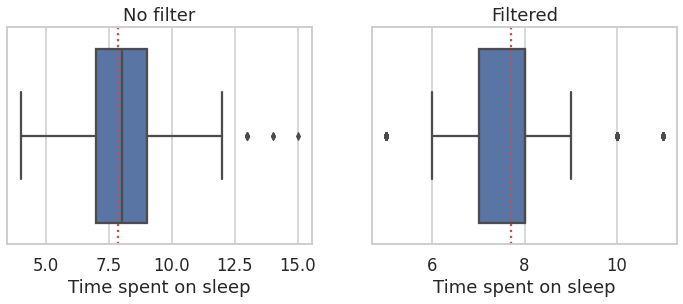

In [ ]:
graphic_filter(df, 'Time spent on sleep', 1.5)

### Time spent on social media

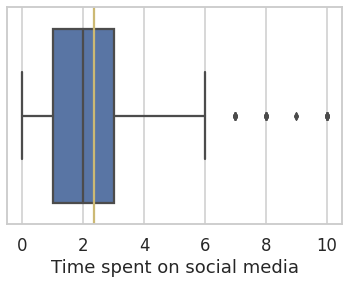

In [ ]:
sns.boxplot(x=df['Time spent on social media'])
plt.axvline(df['Time spent on social media'].mean(), c='y')

### Time spent on TV

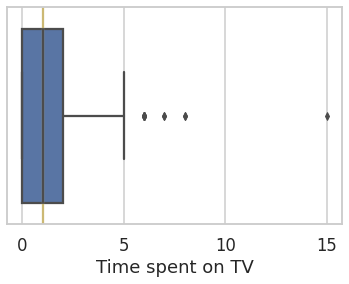

In [ ]:
sns.boxplot(x=df['Time spent on TV'])
plt.axvline(df['Time spent on TV'].mean(), c='y')

### Number of meals per day

Media antes del filtro: 2.92
Mediana antes del filtro: 3.0
Desviación estándar antes del filtro: 0.83

Media después del filtro: 2.89
Mediana después del filtro: 3.0
Desviación estándar después del filtro: 0.77


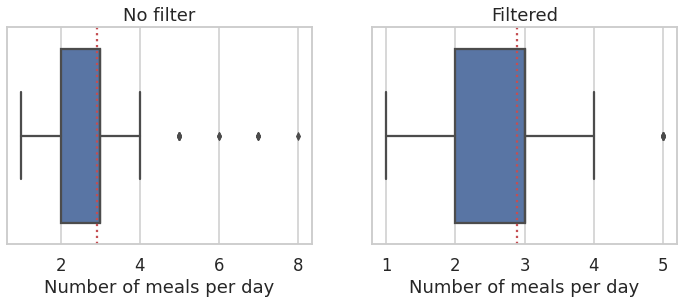

In [ ]:
graphic_filter(df, 'Number of meals per day', 2.5)

Ahora para todas nuestras columnas, tomando como filtro estándar el valor de 1.5 veces el rango intercuartílico inferior y superior, la media, mediana y desviación de las variables se modifican como sigue:

In [ ]:
def removeOutliers(data, col):
    Q3 = np.quantile(data[col], 0.75)
    Q1 = np.quantile(data[col], 0.25)
    IQR = Q3 - Q1
     
    global outlier_free_list
    global filtered_data
     
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    outlier_free_list = [x for x in data[col] if (
        (x > lower_range) & (x < upper_range))]
    filtered_data = data.loc[data[col].isin(outlier_free_list)]
 
 
for i in df_num.columns:
    removeOutliers(df_num, i)

In [ ]:
df_num.mean()
filtered_data.mean()

Age of Subject                20.165821
Time spent on Online Class     3.208841
Time spent on self study       2.911591
Time spent on fitness          0.765821
Time spent on sleep            7.871235
Time spent on social media     2.365694
Time spent on TV               1.013959
Number of meals per day        2.917936
dtype: float64

## Tablas de Frecuencia e histogramas

Ahora observamos la distribución de las variables y segmentamos nuestros datos basándonos en su rango.

### Age

In [ ]:
ages = df_num['Age of Subject']
ages.max() - ages.min()

52

In [ ]:
segmentos = pd.cut(ages, 5)
ages.groupby(segmentos).count()

Age of Subject
(6.948, 17.4]    302
(17.4, 27.8]     793
(27.8, 38.2]      63
(38.2, 48.6]      21
(48.6, 59.0]       3
Name: Age of Subject, dtype: int64

Curtosis: 6.946326833470083
Asimetría: 1.9425240356161668


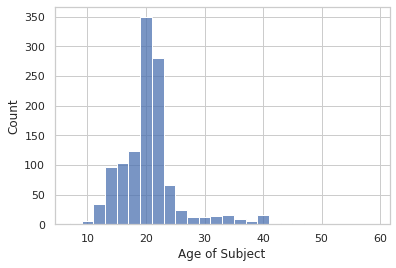

In [ ]:
sns.set(style='whitegrid')
print('Curtosis:', kurtosis( ages ))
print('Asimetría:', skew( ages ));
sns.histplot(ages, kde=False, bins=26);

### Time spent on online class

In [ ]:
online_class = df_num['Time spent on Online Class']
online_class.max() - online_class.min()

10.0

In [ ]:
segmentos = pd.cut(online_class, 11)
online_class.groupby(segmentos).count()

Time spent on Online Class
(-0.01, 0.909]    152
(0.909, 1.818]    119
(1.818, 2.727]    203
(2.727, 3.636]    178
(3.636, 4.545]    222
(4.545, 5.455]    142
(5.455, 6.364]     94
(6.364, 7.273]     31
(7.273, 8.182]     32
(8.182, 9.091]      5
(9.091, 10.0]       4
Name: Time spent on Online Class, dtype: int64

Curtosis: -0.28534268692762543
Asimetría: 0.3656476758396127


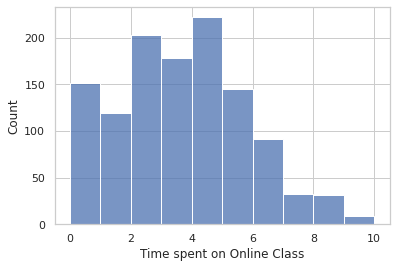

In [ ]:
sns.set(style='whitegrid')
print('Curtosis:', kurtosis( online_class ))
print('Asimetría:', skew( online_class ));
sns.histplot( online_class, kde=False, binwidth=1);

### Time spent on self study

In [ ]:
self_study = df_num['Time spent on self study']
self_study.max() - self_study.min()

18.0

In [ ]:
segmentos = pd.cut(self_study, 9)
self_study.groupby(segmentos).count()

Time spent on self study
(-0.018, 2.0]    619
(2.0, 4.0]       364
(4.0, 6.0]       130
(6.0, 8.0]        44
(8.0, 10.0]       17
(10.0, 12.0]       6
(12.0, 14.0]       0
(14.0, 16.0]       0
(16.0, 18.0]       2
Name: Time spent on self study, dtype: int64

Curtosis: 5.423180197902429
Asimetría: 1.730514213791227


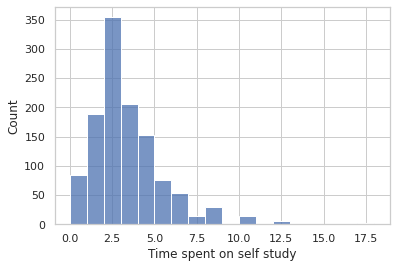

In [ ]:
sns.set(style='whitegrid')
print('Curtosis:', kurtosis( self_study ))
print('Asimetría:', skew( self_study ));
sns.histplot( self_study, kde=False, binwidth=1);

### Time spent on fitness

In [ ]:
fitness = df_num['Time spent on fitness']
fitness.max() - fitness.min()

5.0

In [ ]:
segmentos = pd.cut(fitness, 6)
fitness.groupby(segmentos).count()

Time spent on fitness
(-0.005, 0.833]    485
(0.833, 1.667]     550
(1.667, 2.5]       120
(2.5, 3.333]        25
(3.333, 4.167]       1
(4.167, 5.0]         1
Name: Time spent on fitness, dtype: int64

Curtosis: 1.5705858379298991
Asimetría: 0.9669438302120138


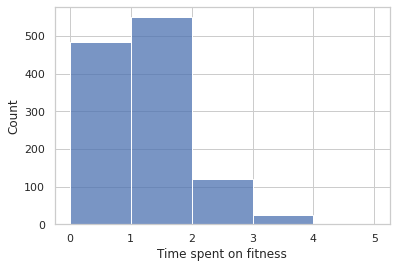

In [ ]:
sns.set(style='whitegrid')
print('Curtosis:', kurtosis( fitness ))
print('Asimetría:', skew( fitness ));
sns.histplot( fitness, kde=False, binwidth=1);

### Time spent on sleep

In [ ]:
sleep = df_num['Time spent on sleep']
sleep.max() - sleep.min()

11.0

In [ ]:
segmentos = pd.cut(sleep, 11)
sleep.groupby(segmentos).count()

Time spent on sleep
(3.989, 5.0]     51
(5.0, 6.0]      171
(6.0, 7.0]      260
(7.0, 8.0]      395
(8.0, 9.0]      134
(9.0, 10.0]      96
(10.0, 11.0]     25
(11.0, 12.0]     42
(12.0, 13.0]      5
(13.0, 14.0]      2
(14.0, 15.0]      1
Name: Time spent on sleep, dtype: int64

Curtosis: 0.9982916835712357
Asimetría: 0.7345656898907925


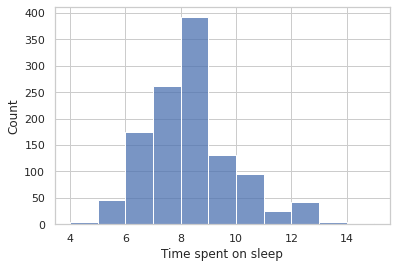

In [ ]:
sns.set(style='whitegrid')
print('Curtosis:', kurtosis( sleep ))
print('Asimetría:', skew( sleep ));
sns.histplot( sleep, kde=False, binwidth=1);

### Time spent on social media

In [ ]:
social_media = df_num['Time spent on social media']
social_media.max() - social_media.min()

10.0

In [ ]:
segmentos = pd.cut(social_media, 11)
social_media.groupby(segmentos).count()

Time spent on social media
(-0.01, 0.909]     82
(0.909, 1.818]    359
(1.818, 2.727]    335
(2.727, 3.636]    170
(3.636, 4.545]    112
(4.545, 5.455]     58
(5.455, 6.364]     29
(6.364, 7.273]     10
(7.273, 8.182]     11
(8.182, 9.091]      2
(9.091, 10.0]      14
Name: Time spent on social media, dtype: int64

Curtosis: 3.8425947214149367
Asimetría: 1.69714957696885


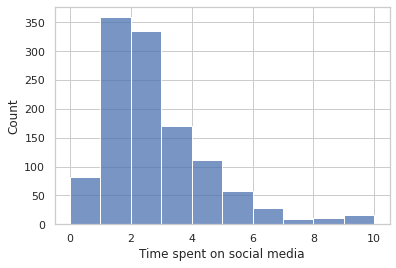

In [ ]:
sns.set(style='whitegrid')
print('Curtosis:', kurtosis( social_media ))
print('Asimetría:', skew( social_media ));
sns.histplot( social_media, kde=False, binwidth=1);

### Time spent on TV

In [ ]:
tv = df_num['Time spent on TV']
tv.max() - tv.min()

15.0

In [ ]:
segmentos = pd.cut(tv, 8)
tv.groupby(segmentos).count()

Time spent on TV
(-0.015, 1.875]    872
(1.875, 3.75]      260
(3.75, 5.625]       36
(5.625, 7.5]        11
(7.5, 9.375]         2
(9.375, 11.25]       0
(11.25, 13.125]      0
(13.125, 15.0]       1
Name: Time spent on TV, dtype: int64

Curtosis: 15.867575159546323
Asimetría: 2.681661735980467


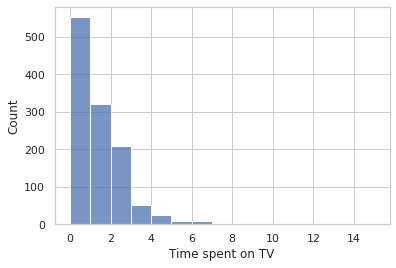

In [ ]:
sns.set(style='whitegrid')
print('Curtosis:', kurtosis( tv ))
print('Asimetría:', skew( tv ));
sns.histplot( tv, kde=False, binwidth=1);

### Number of meals per day

In [ ]:
meals = df_num['Number of meals per day']
meals.max() - meals.min()

7

In [ ]:
segmentos = pd.cut(meals, 7)
meals.groupby(segmentos).count()

Number of meals per day
(0.993, 2.0]    328
(2.0, 3.0]      610
(3.0, 4.0]      229
(4.0, 5.0]        8
(5.0, 6.0]        2
(6.0, 7.0]        4
(7.0, 8.0]        1
Name: Number of meals per day, dtype: int64

Curtosis: 2.7161073375577365
Asimetría: 0.46638140614890444


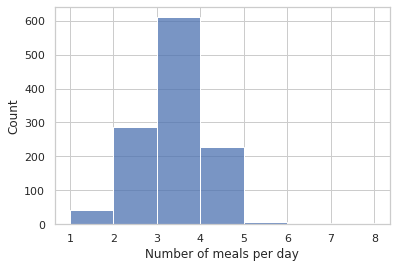

In [ ]:
sns.set(style='whitegrid')
print('Curtosis:', kurtosis( meals ))
print('Asimetría:', skew( meals ));
sns.histplot( meals, kde=False, binwidth=1);

## Gráficos de densidad

Vamos a usar como categoría el medio que se usa para las clases en línea

In [ ]:
df['Medium for online class'].unique()

array(['Laptop/Desktop', 'Smartphone', 'Tablet', 'No medium',
       'Any Gadget', 'Smartphone or Laptop/Desktop'], dtype=object)

In [ ]:
df_group = df.groupby('Age of Subject')['Time spent on Online Class', 'Time spent on self study'].mean()

In [ ]:
df_medium = df.groupby('Age of Subject')['Medium for online class'].last()

In [ ]:
df_fusion = df_group.merge(df_medium, left_index=True, right_index=True)
df_fusion.head(10)

,Time spent on Online Class,Time spent on self study,Medium for online class
Age of Subject,,,
7,2.000000,2.000000,Smartphone
8,2.000000,1.500000,Laptop/Desktop
9,3.000000,1.500000,Smartphone or Laptop/Desktop
10,4.000000,2.250000,Smartphone
11,3.333333,1.666667,Smartphone
12,3.741379,2.368966,Smartphone
13,3.890625,2.520833,Tablet
14,4.406250,2.527083,Laptop/Desktop
15,4.594595,3.689189,Tablet


In [ ]:
df_smartphone = df_fusion[df_fusion['Medium for online class']=='Smartphone']

In [ ]:
tablet = df_fusion[df_fusion['Medium for online class']=='Tablet']

In [ ]:
laptop = df_fusion[df_fusion['Medium for online class']=='Laptop/Desktop']

Text(0.5, 1.0, 'Gráfica de densidad de tiempo en clases en línea')

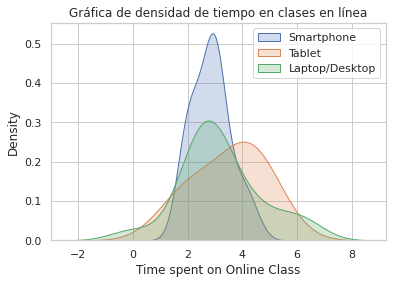

In [ ]:
sns.distplot(df_smartphone['Time spent on Online Class'], hist = False, kde_kws = {'shade': True}, label='Smartphone')
sns.distplot(tablet['Time spent on Online Class'], hist = False, kde_kws = {'shade': True}, label = 'Tablet')
sns.distplot(laptop['Time spent on Online Class'], hist = False, kde_kws = {'shade': True}, label = 'Laptop/Desktop')
plt.legend()
plt.title('Gráfica de densidad de tiempo en clases en línea')

Notamos que la gente que usa smartphones y laptops o computadoras de escritorio para estudiar, pasan típicamente 3 horas estudiando, mientras que los de tablet estudian 4 horas al día

Text(0.5, 1.0, 'Gráfica de densidad de horas de autoestudio')

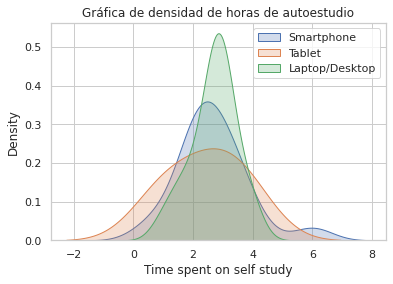

In [ ]:
sns.distplot(df_smartphone['Time spent on self study'], hist = False, kde_kws = {'shade': True}, label='Smartphone')
sns.distplot(tablet['Time spent on self study'], hist = False, kde_kws = {'shade': True}, label = 'Tablet')
sns.distplot(laptop['Time spent on self study'], hist = False, kde_kws = {'shade': True}, label = 'Laptop/Desktop')
plt.legend()
plt.title('Gráfica de densidad de horas de autoestudio')

Aunque usando distintos dispositivos los estudiantes suelen a estudiar 3 horas por su cuenta, vemos que al usar tablets o smartphones aumenta la desviación estándar.

In [ ]:
#Guardarémos el archivo limpio para usarlo posteriormente
df.to_csv('/content/COVID-19 Survey Student Responses-clean.csv')